In [2]:
import pandas as pd
import numpy as np
from PIL import Image
import seaborn as sns
import csv
#from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

from tqdm import tqdm_notebook
import matplotlib.pyplot as plt
from sklearn.decomposition import FastICA, TruncatedSVD, NMF
from scipy import signal
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster.bicluster import SpectralBiclustering
from sklearn.datasets import samples_generator as sg
from sklearn.metrics import consensus_score


%matplotlib inline

In [3]:
input_path = '../joke_recommender/data/'
df = pd.read_csv(input_path + 'joke_dataframe.csv')
df = df.drop(['Unnamed: 0', 'JokeId'], axis = 1)
df

,User1,User2,User3,User4,User5,User6,User7,User8,User9,User10,...,User73412,User73413,User73414,User73415,User73416,User73417,User73418,User73419,User73420,User73421
0,5.10,-8.79,-3.50,7.14,-8.79,9.22,-4.03,3.11,-3.64,-7.67,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,4.90,-0.87,-2.91,-3.88,-0.58,9.37,-1.55,0.92,-3.35,-5.15,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1.75,1.99,-2.18,-3.06,-0.58,-3.93,-3.64,7.52,-6.46,-3.25,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,-4.17,-4.61,-0.10,0.05,8.98,9.27,-6.99,0.49,-3.40,-1.65,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5.15,5.39,7.52,6.26,7.67,3.45,5.44,-0.58,1.26,4.03,...,3.64,4.32,6.99,-9.66,-8.4,-0.63,9.51,-7.67,-1.6,8.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,6.31,-1.02,3.98,3.93,9.13,1.94,0.44,1.21,6.94,1.12,...,2.28,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
96,-4.95,-0.97,-6.46,-2.57,9.17,1.99,-0.78,5.34,5.83,0.78,...,NaN,NaN,NaN,NaN,NaN,0.78,NaN,NaN,NaN,NaN
97,-0.19,4.13,-6.89,1.07,9.17,3.45,-1.02,1.94,5.53,4.76,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
98,3.25,-1.84,-2.33,2.33,9.08,9.17,1.70,3.06,6.55,7.86,...,7.33,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
X = np.array(df)
scaler = MinMaxScaler(feature_range=(1,2))
scaler.fit(X)
X_transform = scaler.transform(X)
X = np.nan_to_num(X_transform)
X

array([[1.77986437, 1.06564799, 1.33225458, ..., 0.        , 0.        ,
        0.        ],
       [1.7694314 , 1.51386531, 1.36407767, ..., 0.        , 0.        ,
        0.        ],
       [1.60511215, 1.67572156, 1.403452  , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [1.50391236, 1.79683079, 1.14940669, ..., 0.        , 0.        ,
        0.        ],
       [1.68335942, 1.45897001, 1.39536138, ..., 0.        , 0.        ,
        0.        ],
       [1.74178404, 1.73061686, 1.12297735, ..., 0.        , 0.        ,
        0.        ]])

In [5]:
X = pd.DataFrame(X)
# X.to_csv('scaled_df.csv')
X.head(5)

,0,1,2,3,4,5,6,7,8,9,...,73412,73413,73414,73415,73416,73417,73418,73419,73420,73421
0,1.779864,1.065648,1.332255,1.898623,1.057602,1.992216,1.350401,1.688979,1.246819,1.114807,...,0.000000,0.000000,0.00000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000
1,1.769431,1.513865,1.364078,1.291460,1.483653,2.000000,1.503393,1.562608,1.265267,1.250000,...,0.000000,0.000000,0.00000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000
2,1.605112,1.675722,1.403452,1.336639,1.483653,1.309808,1.374460,1.943451,1.067430,1.351931,...,0.000000,0.000000,0.00000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000
3,1.296296,1.302207,1.515642,1.507989,1.979761,1.994811,1.167798,1.537796,1.262087,1.437768,...,0.000000,0.000000,0.00000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000
4,1.782473,1.868138,1.926645,1.850138,1.911780,1.692787,1.934608,1.476053,1.558524,1.742489,...,1.707087,1.765074,1.19598,1.0,1.079971,1.784543,2.0,1.142857,1.595135,1.877922


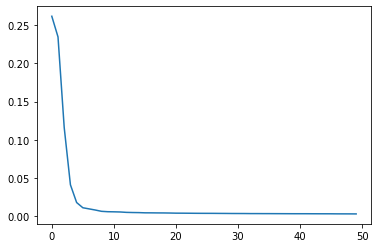

In [6]:
svd = TruncatedSVD(n_components=50)
svd.fit(X)
evr = svd.explained_variance_ratio_
sns.lineplot(x = range(0,50), y = evr)

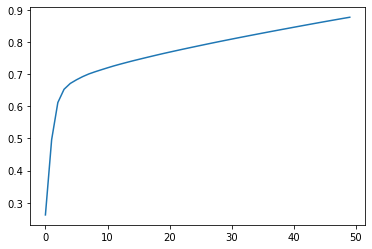

In [7]:
evr_sum = np.cumsum(evr)
sns.lineplot(x = range(0,50), y = evr_sum)

In [8]:
evr_sum

array([0.26147585, 0.49595488, 0.61198758, 0.65335751, 0.67155726,
       0.68295003, 0.69286422, 0.70129417, 0.70802721, 0.71424872,
       0.72032381, 0.72619557, 0.73155911, 0.73671547, 0.74175896,
       0.7465264 , 0.75125818, 0.75590199, 0.76050826, 0.76499942,
       0.7693196 , 0.77361465, 0.77784594, 0.78200003, 0.78610659,
       0.79018708, 0.79425321, 0.7982513 , 0.80220625, 0.80608997,
       0.80995236, 0.81379177, 0.81755657, 0.82131397, 0.82503799,
       0.82874842, 0.83242277, 0.83607342, 0.83969366, 0.84328392,
       0.84686865, 0.85044689, 0.85399676, 0.85751982, 0.86102767,
       0.86451883, 0.86794065, 0.87134956, 0.87473483, 0.87807203])

In [9]:
#We chose a evr_sum of 0.8
np.where(np.logical_and (evr_sum > 0.79, evr_sum < 0.81))

(array([25, 26, 27, 28, 29, 30]),)

In [10]:
# We chose 28 principal components
opt_svd = TruncatedSVD(n_components=28)
svd_X = opt_svd.fit_transform(X)

In [11]:
# df2 = df.head(2)
# corr = df2.corr()
# ax = sns.heatmap(corr, vmin = 1, vmax = 2, center = 0, cmap=sns.diverging_palette(20,220,n=200), square = True);

In [1]:
svd_X.shape

NameError: name 'svd_X' is not defined

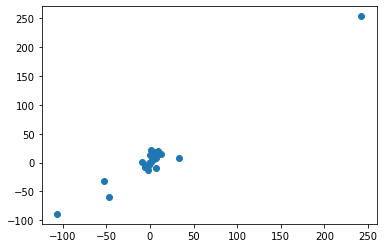

In [12]:
plt.scatter(svd_X[0],svd_X[1])

In [15]:
n_clusters = (10,20)
plt.matshow(nmf.X, cmap=plt.cm.Blues)
plt.title("Original dataset")

NameError: name 'nmf' is not defined

In [12]:
nmf = NMF(n_components=20)
nmf_X = nmf.fit_transform(X)

KeyboardInterrupt: 

In [18]:
nmfdf = pd.DataFrame(nmf_X)
nmfdf.head(10)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,5.013954,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,1.105096,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,3.924940,0.000000,0.000000,0.000000,0.000000,0.146407,0.000000,0.0,0.000000,5.011784,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.005357,0.000000,0.000000
2,4.676467,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,2.012164,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,4.659965,0.000000,0.000000,0.000000,0.000000,0.207326,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.077091,0.000000,0.000000,0.000000
4,0.784453,3.381192,0.478941,8.676469,0.674887,1.601804,1.474274,0.0,0.285035,1.693814,0.343412,0.000000,1.203639,0.000000,1.366106,0.000000,0.255052,0.224485,0.000000,0.308129
5,3.605373,0.000000,0.000000,0.000000,2.029049,0.000000,0.000000,0.0,0.000000,3.073944,0.000000,2.073076,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
6,0.956606,3.448307,0.635304,8.115349,1.047541,1.465987,1.805428,0.0,0.000000,1.377434,0.827006,0.000000,0.000000,0.000000,0.449847,0.356476,0.010995,0.000000,0.517285,0.000000
7,1.027239,2.968152,0.758327,7.981296,0.747155,1.234587,1.593223,0.0,0.000000,1.182050,1.498250,0.000000,0.654742,0.615119,0.274064,0.000000,0.000000,0.020356,0.290189,0.000000
8,4.933066,0.000000,0.021968,0.000000,0.000000,0.006195,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
9,3.760403,0.000000,0.000000,0.000000,2.800847,0.000000,0.000000,0.0,0.000000,3.166405,0.000000,0.435298,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


Text(0.5, 1.05, 'Shuffled dataset')

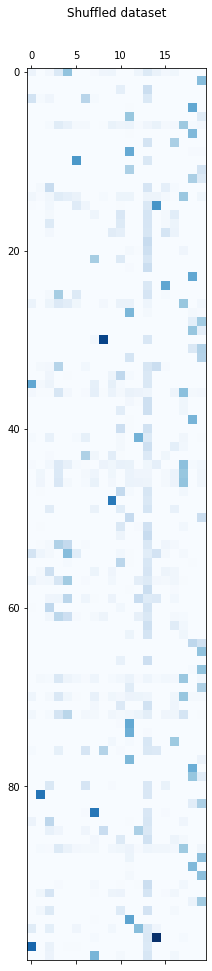

In [91]:
nmf.X1, row_idx, col_idx = sg._shuffle(nmf.X, random_state=0)
plt.matshow(nmf.X1, cmap=plt.cm.Blues)
plt.title("Shuffled dataset")

Text(0.5, 1.05, 'After biclustering; rearranged to show biclusters')

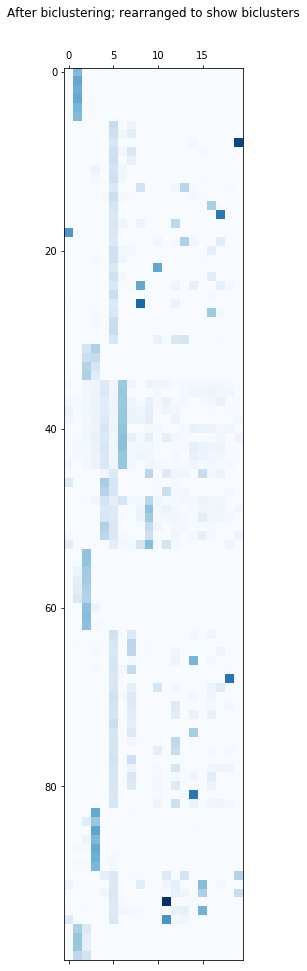

In [92]:
model = SpectralBiclustering(n_clusters=n_clusters, method='log', random_state=0)
model.fit(nmf.X)

fit_data = nmf.X[np.argsort(model.row_labels_)]
fit_data = fit_data[:, np.argsort(model.column_labels_)]

plt.matshow(fit_data, cmap=plt.cm.Blues)
plt.title("After biclustering; rearranged to show biclusters")

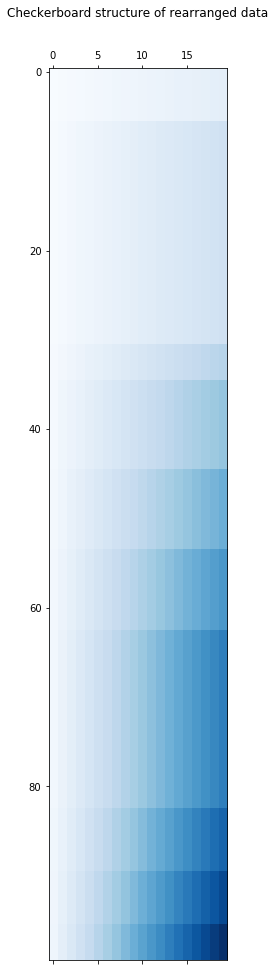

In [93]:
plt.matshow(np.outer(np.sort(model.row_labels_) + 1,
                     np.sort(model.column_labels_) + 1),
            cmap=plt.cm.Blues)
plt.title("Checkerboard structure of rearranged data")

plt.show()

In [95]:
fit_data

array([[ 0.        ,  9.32807735,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        , 10.98630787,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        , 10.33690737,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [ 0.        ,  8.15342758,  2.19441668, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  8.14984063,  1.85452925, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  5.70401056,  3.97102882, ...,  0.        ,
         0.        ,  0.        ]])

In [18]:
X.T.head(10)

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,1.779864,1.769431,1.605112,1.296296,1.782473,1.605112,1.762128,1.685968,1.379760,1.440271,...,1.792384,1.273344,1.701095,1.888367,1.561815,1.842984,1.255608,1.503912,1.683359,1.741784
1,1.065648,1.513865,1.675722,1.302207,1.868138,1.518959,1.653650,1.623656,1.071307,1.299377,...,1.766271,1.631579,1.724958,1.560272,1.464063,1.505376,1.508206,1.796831,1.458970,1.730617
2,1.332255,1.364078,1.403452,1.515642,1.926645,1.588997,1.230313,1.601942,1.067961,1.756742,...,1.620280,1.303668,1.444984,1.610032,1.316613,1.735707,1.172600,1.149407,1.395361,1.122977
3,1.898623,1.291460,1.336639,1.507989,1.850138,1.871625,1.090909,1.906336,1.221488,1.111846,...,1.258953,1.855647,1.764738,1.219284,1.850138,1.721763,1.363636,1.564187,1.633609,1.486501
4,1.057602,1.483653,1.483653,1.979761,1.911780,1.941879,1.725480,1.644525,1.012455,1.642449,...,1.498703,2.000000,1.944473,1.987545,1.334717,1.987545,1.989621,1.989621,1.984951,1.979761
5,1.992216,2.000000,1.309808,1.994811,1.692787,1.092891,1.743124,1.654904,1.984951,1.987545,...,1.551635,1.455631,1.632071,1.710431,1.707836,1.614427,1.617021,1.692787,1.989621,1.433316
6,1.350401,1.503393,1.374460,1.167798,1.934608,1.182603,1.589759,1.236891,1.380629,1.278840,...,1.589759,1.353486,1.185688,1.679827,1.856262,1.626157,1.550895,1.536089,1.703886,1.859346
7,1.688979,1.562608,1.943451,1.537796,1.476053,1.633006,1.495672,1.974611,1.672245,1.943451,...,1.725332,1.716676,1.630121,1.579342,1.579342,1.579342,1.817657,1.621466,1.686093,1.716676
8,1.246819,1.265267,1.067430,1.262087,1.558524,1.500000,1.286896,1.055344,1.262087,1.564885,...,1.833333,1.919847,1.713104,1.719466,1.716285,1.919847,1.849237,1.830153,1.895038,1.722010
9,1.114807,1.250000,1.351931,1.437768,1.742489,1.625000,1.804721,1.510730,1.336373,2.000000,...,1.718884,1.208691,1.406652,1.750000,1.846567,1.586373,1.568133,1.781652,1.947961,1.638412


In [81]:
# creating a slightly more manageable dataset of 20 users and 20 jokes
I = 20 #20 users
M = 20 #20 jokes
topusers = X.sum(axis=0).sort_values(ascending=False).head(100).tail(I)
topusers

11494    187.714208
2537     187.614583
7813     187.525330
8968     187.446520
11969    187.428977
5495     187.418853
4256     187.404774
1552     187.354143
5154     187.335714
10894    187.332656
10212    187.320815
11819    187.292789
11478    187.246445
13624    187.184211
5810     187.127551
6326     187.050879
4241     187.044549
6890     186.940824
5133     186.828767
1613     186.818510
dtype: float64

In [31]:
topjokes = X.sum(axis=1).sort_values(ascending=False).head(100).tail(M)
topjokes

91    33437.110463
86    32869.080655
82    32711.166705
80    32138.484053
89    32054.395694
75    31956.900482
71    31615.962410
84    31520.529608
85    31372.283579
77    31234.891594
83    30961.483225
99    30678.030733
79    30607.063464
81    30543.348270
76    30177.214281
78    29457.880094
72    29416.025350
74    28271.234804
73    26940.069252
70    26813.628729
dtype: float64

In [32]:
Xsub = X.T.loc[topusers.index, topjokes.index]
Xsub

,91,86,82,80,89,75,71,84,85,77,83,99,79,81,76,78,72,74,73,70
11494,1.973770,1.992350,2.000000,1.984153,1.957923,1.997268,1.986885,1.833333,1.949727,1.957923,2.000000,1.986885,1.981421,1.761202,1.962842,1.957923,1.973770,1.984153,1.989617,1.976503
2537,1.949653,1.859375,1.972222,1.989005,1.786458,1.983218,1.868056,1.983218,1.989005,1.940972,1.786458,1.868056,1.643519,2.000000,1.932870,1.913194,1.983218,1.983218,1.983218,1.977431
7813,1.888966,1.922970,1.798057,1.902845,1.909091,1.895906,1.906315,1.922970,1.899375,1.899375,1.922970,1.919500,1.926440,1.939625,1.888966,1.902845,1.939625,1.670368,1.852186,1.899375
8968,1.851726,1.876627,1.961517,1.942275,1.917374,1.851726,1.857385,1.862479,1.887380,1.934352,1.900962,1.818902,1.854556,1.895869,1.857385,1.859649,1.898132,1.947934,1.890209,1.931522
11969,1.965909,1.965909,1.971591,1.978693,1.965909,1.978693,1.978693,1.958807,1.965909,1.978693,1.965909,2.000000,1.978693,1.978693,1.978693,1.978693,1.978693,1.978693,1.978693,1.978693
5495,1.952381,1.896016,1.933916,1.787172,1.966958,1.948494,1.962099,1.933916,1.933916,1.915452,1.933916,1.896016,1.796890,1.933916,1.919339,1.929057,1.952381,1.948494,1.952381,1.962099
4256,1.997405,1.982356,1.990140,1.977167,1.994811,1.994811,1.994811,1.997405,1.977167,1.994811,1.994811,1.949663,1.987545,1.992216,1.982356,1.992216,1.984951,1.040477,1.418267,1.994811
1552,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.148695,2.000000,2.000000,2.000000,2.000000,1.997162,2.000000,2.000000,2.000000,1.969921,1.997162,2.000000,2.000000,1.997162
5154,1.954945,1.952198,1.853297,1.959890,1.922527,1.946703,1.871978,1.970879,1.914835,1.893407,1.970879,1.954945,1.887912,1.922527,1.864286,1.818681,1.906593,1.824176,1.962637,1.946703
10894,2.000000,1.983740,1.953930,1.976965,1.924119,1.953930,1.964092,1.943767,1.960705,1.943767,1.894986,1.894986,1.924119,1.226965,1.970190,1.950542,1.970190,1.911247,1.000000,1.943767
